In [2]:
# Puerta AND
"""
data=[[-1,-1,1],
      [-1,1,1],
      [1,-1,1],
      [1,1,1]]
target=[-1,-1,-1,1]
"""

In [9]:
#Puerta OR
data = [ [-1, -1, 1],
         [-1,  1, 1],
         [ 1, -1, 1],
         [ 1,  1, 1] ]
target = [-1,
           1,
           1,
           1 ]     

'\ndata=[[-1,-1,1],\n]----[-1,-1,1],\n----[-1,-1,1],\n----[-1,-1,1],\ntarget   '
Datos de Entrenamiento

In [10]:
print ("Data:",data)
print ("target", target)

Data: [[-1, -1, 1], [-1, 1, 1], [1, -1, 1], [1, 1, 1]]
target [-1, 1, 1, 1]


Inicializo los pesos,bias y la tasa de aprendizaje

In [11]:
data=data[::-1]
target=target[::-1]
print ("Data", data)
print ("Target", target)

Data [[1, 1, 1], [1, -1, 1], [-1, 1, 1], [-1, -1, 1]]
Target [1, 1, 1, -1]


Iterando sobre la informacion de entrenamiento

In [14]:
from tabulate import tabulate
w1=0.0
w2=0.0
b=0.0
lr = 1
iterations= 10
data_out = [ ]
weigths = [ ]
weigths.append( [w1, w2, b])
for epoch in range ( iterations):
    for x,y in zip (data,target):
        yin = w1*x[0] + w2*x[1] + b*x[2]
         #activation function
        if ( yin < 0.0  ):
            yin = -1
        else:
            if (yin == 0.0):
             yin =0.0
             if ( yin > 0.0 ):
                 yin = 1
        e = y-yin
        if int(y) != int(yin):  # actualizando los pesos y bias
            w1 = w1 + lr*y*x[0]
            w2 = w2 + lr*y*x[1]
            b = b + lr*y
            #guarda los pesos actualizados
            weigths.append( [w1, w2, b])
            data_out.append(  [epoch, x[0], x[1], x[2], yin, y, y, e, '-', w1,w2,b, int(y) != int(yin)] )
    data_out.append (['-','-','-','-','-','-','-','-','-','-','-']) 
print(tabulate( data_out,
                headers=['Epoch', 'x1', 'x2', 'b', 'yin', 'y', 't', 'E','-', 'w1', 'w2','b', 'update']))    

Epoch    x1    x2    b    yin    y    t    E      -    w1    w2      b  update
-------  ----  ----  ---  -----  ---  ---  -----  ---  ----  ----  ---  --------
0        1     1     1    0.0    1    1    1.0    -    1.0   1.0     1  True
-        -     -     -    -      -    -    -      -    -     -
1        1     1     1    3.0    1    1    -2.0   -    2.0   2.0     2  True
1        1     -1    1    2.0    1    1    -1.0   -    3.0   1.0     3  True
-        -     -     -    -      -    -    -      -    -     -
2        1     1     1    7.0    1    1    -6.0   -    4.0   2.0     4  True
2        1     -1    1    6.0    1    1    -5.0   -    5.0   1.0     5  True
-        -     -     -    -      -    -    -      -    -     -
3        1     1     1    11.0   1    1    -10.0  -    6.0   2.0     6  True
3        1     -1    1    10.0   1    1    -9.0   -    7.0   1.0     7  True
-        -     -     -    -      -    -    -      -    -     -
4        1     1     1    15.0   1    1    -14.0 

Creando la Representacion Visual

[0.0, 0.0, 0.0]
[1.0, 1.0, 1.0]
[2.0, 2.0, 2.0]
[3.0, 1.0, 3.0]
[4.0, 2.0, 4.0]
[5.0, 1.0, 5.0]
[6.0, 2.0, 6.0]
[7.0, 1.0, 7.0]
[8.0, 2.0, 8.0]
[9.0, 1.0, 9.0]
[10.0, 2.0, 10.0]
[11.0, 1.0, 11.0]


C:\Users\yuulf\AppData\Local\Temp\ipykernel_336\3439088830.py:13: RuntimeWarning: invalid value encountered in scalar divide
  y = (-ws[2] -ws[0]*xi) /ws[1]


<Figure size 640x480 with 0 Axes>

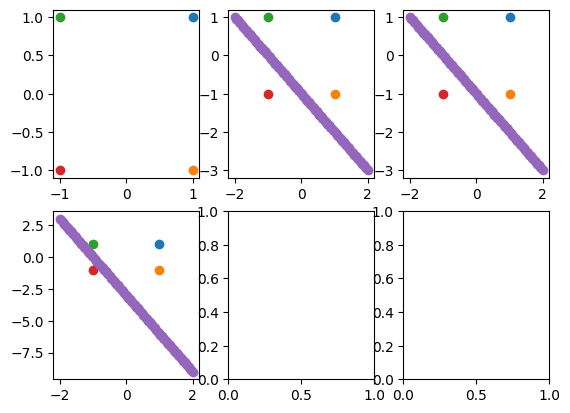

In [13]:
#construyendo el hyperplano en una grafica ax + by + cz = d
import numpy as np
import matplotlib.pyplot as plt
a,b,c = w1,w2,b
data_arr = np.array( data )
x_min = min( data_arr[: ,0 ]-1)
x_max = max( data_arr[: ,0 ]+1)
x = np.linspace(x_min, x_max, 100)
pairs = []
for ws in weigths:
  it = []
  for xi in  x :
    y = (-ws[2] -ws[0]*xi) /ws[1]
    it.append( [xi,y])
  pairs.append(it)
  print(ws)
data_arr = np.array( data )
data_arr_x = data_arr [ : , 0 ]
data_arr_y = data_arr [ : , 1 ]
pairs = np.array(pairs)
plt.figure(1)
fig, axis = plt.subplots(2, 3)
for idx,idy in zip ( data_arr_x, data_arr_y  ):
    axis[0,0].scatter(idx, idy )
    axis[0,1].scatter(idx, idy )
    axis[0,2].scatter(idx, idy )
    axis[1,0].scatter(idx, idy )
axis[0,0].scatter(pairs[0,: ,0], pairs[0, :,1] )
#axis[0,0].grid()
axis[0,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[0,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[1,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )
plt.show()
